In [1]:
from expansion_tools.blob_expansion_tools_jetset import *
from expansion_tools.delay_analysis import gamma_radio_delay_analysis_vs_freq,plot_lcs,gamma_radio_delay_analysis_vs_v_exp
from jetset.data_loader import Data,ObsData
from jetset.plot_sedfit import PlotSED


## expansion short

In [55]:
from jetset.jet_timedep import JetTimeEvol
temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_flare/temp_ev_acc_flare.pkl')
R0=temp_ev_acc_flare.rad_region.jet.parameters.R.val

def delta_t_est(t_exp,R0,beta_exp):
    return t_exp+R0/(beta_exp*3E10)

def t_dec_est(R0,a,beta_exp):
    return ((R0+beta_exp*3E10)*np.power(beta_exp*3E10,a))




In [56]:
def updage_fig(fig):
    for ax in fig.axes:
        try:
            ax.ticklabel_format(axis='y', style='sci')
            ax.yaxis.major.formatter._useMathText = True
        except:
            print('ticklabel_format failed')
            pass
        
        ax.legend( loc='best', ncol=1,fontsize=15)
        ax.xaxis.label.set_size(15)
        ax.xaxis.set_tick_params(labelsize=15)
        ax.yaxis.label.set_size(15)
        ax.yaxis.set_tick_params(labelsize=15)

In [57]:
def update_sed_plot(p):
    p.sedplot.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1,fontsize=15)
    p.sedplot.xaxis.label.set_size(15)
    p.sedplot.xaxis.set_tick_params(labelsize=15)

    p.secaxy.xaxis.label.set_size(15)
    p.secaxy.xaxis.set_tick_params(labelsize=15)

    p.sedplot.yaxis.label.set_size(15)
    p.sedplot.yaxis.set_tick_params(labelsize=15)
    p.fig.tight_layout()

In [58]:
def update_lc_plot(fig):
    for ax in fig.axes:
        ax.ticklabel_format(axis='y', style='sci')
        ax.yaxis.major.formatter._useMathText = True
        
        ax.legend( loc='best', ncol=1,fontsize=15)
        ax.xaxis.label.set_size(15)
        ax.xaxis.set_tick_params(labelsize=15)
        ax.yaxis.label.set_size(15)
        ax.yaxis.set_tick_params(labelsize=15)
        
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)
    fig.tight_layout()

In [59]:
rest_frame='obs'
delta_t_out=1E3
t_exp=1E7
step=10

In [60]:
temp_ev_expansion=JetTimeEvol.load_model('temp_ev_sim_exp_vs_no_exp/temp_ev_expansion_beta_exp=0.100.pkl')
temp_ev_flare=JetTimeEvol.load_model('temp_ev_sim_flare/temp_ev_acc_flare.pkl')

In [78]:
offset_flare=temp_ev_flare.parameters.duration.val
print('offset_flare',offset_flare)

offset_flare 1000000.0


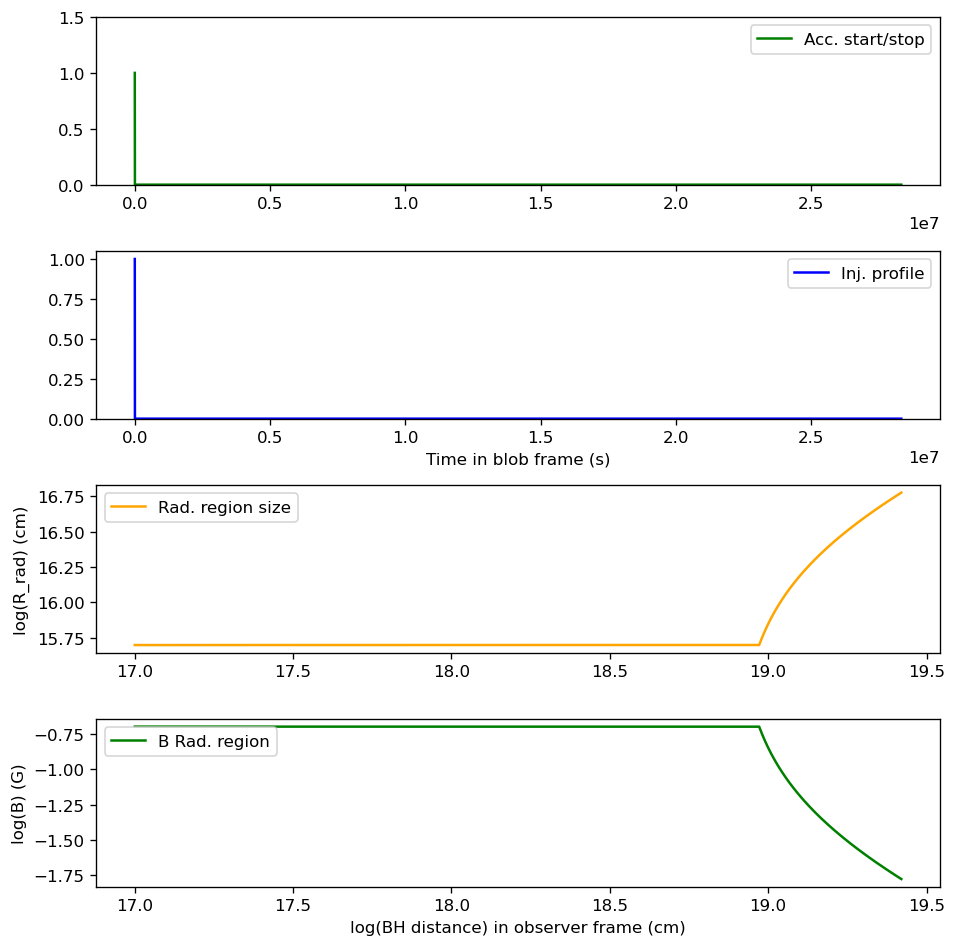

In [77]:
%matplotlib inline
p=temp_ev_expansion.plot_time_profile()

In [128]:
%matplotlib agg

In [145]:
plt.ioff()
for i in range(0,1000,step):
    p=PlotSED(frame='obs',density=True)
    p.resplot.remove()
    skip_label=False
    t=temp_ev_expansion.rad_region.time_sampled_emitters._get_time_samples(time_slice=i)
    s=temp_ev_expansion.rad_region.get_SED(comp='Sync',time_slice=i,frame='obs',use_cached=True)
    if t[0][0]<temp_ev_expansion.parameters.t_jet_exp.val:
        c='C0'
    else:
        c='C1'
    #label=None
    if i==0:
        label='pre expansion'
    #print(t[0][0],temp_ev_expansion.parameters.t_jet_exp.val)
    if t[0][0]>=temp_ev_expansion.parameters.t_jet_exp.val and skip_label is False:
        label='post expansion'
        #skip_label=True
    p.add_model_plot(model=s,label=label,color=c,density=True,auto_label=False)
    p.rescale(y_min=-27.5,y_max=-23,x_min=7,x_max=19)
    
    p.sedplot.axvline(np.log10(5E9),ls='--',c='green',lw=.5,label='5 GHz')
    p.sedplot.axvline(np.log10(4E10),ls='--',c='blue',lw=.5,label='40 GHz')
    update_sed_plot(p)
    p.fig.savefig('movie_frames_new/fig_fnu_%4.4d.jpg'%i,    pad_inches = 0)
    


#p.fig.savefig('temp_ev_sim_exp_vs_no_exp/Fnu_beta_exp_0.1.pdf',bbox_inches = 'tight',
#    pad_inches = 0)


In [146]:
plt.ioff()

for i in  range(0,1000,step):
    p=PlotSED(frame='obs',density=False)
    p.resplot.remove()
    skip_label=False
    t=temp_ev_expansion.rad_region.time_sampled_emitters._get_time_samples(time_slice=i)
    s=temp_ev_expansion.rad_region.get_SED(comp='Sum',time_slice=i,frame='obs',use_cached=True)
    s_sync=temp_ev_expansion.rad_region.get_SED(comp='Sync',time_slice=i,frame='obs',use_cached=True)
    s_IC=temp_ev_expansion.rad_region.get_SED(comp='SSC',time_slice=i,frame='obs',use_cached=True)

    if t[0][0]<temp_ev_expansion.parameters.t_jet_exp.val:
        c='C0'
    else:
        c='C1'
    #label=None
    if i==0:
        label='pre expansion'
    #print(t[0][0],temp_ev_expansion.parameters.t_jet_exp.val)
    if t[0][0]>=temp_ev_expansion.parameters.t_jet_exp.val and skip_label is False:
        label='post expansion'
        #skip_label=True
    p.add_model_plot(model=s,label=label,color=c,density=False,auto_label=False)

    p.rescale(y_min=-20,y_max=-8,x_min=8,x_max=28)
    
    update_sed_plot(p)
    p.sedplot.axvline(np.log10(5E9),ls='--',c='green',lw=.5,label='5 GHz')
    p.sedplot.axvline(np.log10(4E10),ls='--',c='blue',lw=.5,label='40 GHz')
    update_sed_plot(p)
    p.fig.savefig('movie_frames_new/fig_nu_fnu_%4.4d.jpg'%i, pad_inches = 0)
    
#p.fig.savefig('temp_ev_sim_exp_vs_no_exp/nuFnu_beta_exp_0.1.pdf',bbox_inches = 'tight',
#    pad_inches = 0)
#

In [147]:
import pickle
with open('temp_ev_sim_exp_vs_no_exp/lc_obs_beta_exp=0.100.pkl', 'rb') as f:
    l=pickle.load(f)
l.keys()


dict_keys(['lg_obs', 'lr_obs_5GHz', 'lr_obs_10GHz', 'lr_obs_15GHz', 'lr_obs_20GHz', 'lr_obs_25GHz', 'lr_obs_30GHz', 'lr_obs_35GHz', 'lr_obs_40GHz', 'lopt_obs', 'lmm_obs', 'lx_obs', 'beta_exp'])

In [148]:
plt.ioff()
fig=plot_lcs(exp_lcs='temp_ev_sim_exp_vs_no_exp/lc_obs_beta_exp=0.100.pkl',lcs_names=['lg_obs','lr_obs_5GHz','lr_obs_40GHz'],flare_lcs='temp_ev_sim_flare/lc_obs_flare.pkl')
update_lc_plot(fig)
fig.axes[0].axvline(x=t_exp/86400/temp_ev_expansion.rad_region.jet.parameters.beam_obj.val,ls='--',c='orange')
fig.axes[1].axvline(x=t_exp/86400/temp_ev_expansion.rad_region.jet.parameters.beam_obj.val,ls='--',c='orange')
fig.axes[2].axvline(x=t_exp/86400/temp_ev_expansion.rad_region.jet.parameters.beam_obj.val,ls='--',c='orange')
fig.axes[0].set_ylim(0,None)
fig.axes[1].set_ylim(0,0.5E-24)
fig.axes[2].set_ylim(0,4.5E-24)

(0.0, 4.5e-24)

In [149]:
plt.ioff()

for i in  range(0,1000,step):
    fig=plot_lcs(exp_lcs='temp_ev_sim_exp_vs_no_exp/lc_obs_beta_exp=0.100.pkl',lcs_names=['lg_obs','lr_obs_5GHz','lr_obs_40GHz'],flare_lcs='temp_ev_sim_flare/lc_obs_flare.pkl')
    update_lc_plot(fig)
    t=temp_ev_expansion.rad_region.time_sampled_emitters._get_time_samples(time_slice=i)
    #print(t)
    t=t[0][0]
    if t<temp_ev_expansion.parameters.t_jet_exp.val:
        c='C0'
    else:
        c='C1'
    fig.axes[0].axvline(x=(t_exp+offset_flare)/86400/temp_ev_expansion.rad_region.jet.parameters.beam_obj.val,ls='--',c='orange')
    fig.axes[1].axvline(x=(t_exp+offset_flare)/86400/temp_ev_expansion.rad_region.jet.parameters.beam_obj.val,ls='--',c='orange')
    fig.axes[2].axvline(x=(t_exp+offset_flare)/86400/temp_ev_expansion.rad_region.jet.parameters.beam_obj.val,ls='--',c='orange')
    fig.axes[0].set_ylim(0,None)
    fig.axes[1].set_ylim(0,0.5E-24)
    fig.axes[2].set_ylim(0,4.5E-24)

    fig.axes[0].get_lines()[0].set_color('purple')
    t=fig.axes[0].get_lines()[0].get_xdata()[i]
    f=fig.axes[0].get_lines()[0].get_ydata()[i]
    fig.axes[0].plot(t,f,'o',c=c)
    
    fig.axes[1].get_lines()[0].set_color('green')
    t=fig.axes[1].get_lines()[0].get_xdata()[i]
    f=fig.axes[1].get_lines()[0].get_ydata()[i]
    fig.axes[1].plot(t,f,'o',c=c)
    
    #fig.axes[0].get_lines()[0].set_color()
    t=fig.axes[2].get_lines()[0].get_xdata()[i]
    f=fig.axes[2].get_lines()[0].get_ydata()[i]
    fig.axes[2].plot(t,f,'o',c=c)
    
    fig.axes[0].set_ylim(0,None)
    fig.axes[1].set_ylim(0,0.5E-24)
    fig.axes[2].set_ylim(0,4.5E-24)
    fig.savefig('movie_frames_new/lcs_%4.4d.jpg'%i, pad_inches = 0)

In [158]:
import glob
import subprocess
import sys
l_fnu=glob.glob('movie_frames_new/fig_fnu_*.jpg')
l_nufnu=glob.glob('movie_frames_new/fig_nu_fnu_*.jpg')
lcs=glob.glob('movie_frames_new/lcs*.jpg')
l_fnu.sort()
l_nufnu.sort()
lcs.sort()
for ID,[fnu,nufnu,lc] in enumerate(zip(l_fnu,l_nufnu,lcs)):
    cmd='convert +append %s %s movie_frames_new/tmp_%4.4d.jpg'%(fnu,nufnu,ID)
    command = subprocess.call(cmd, shell=True)
    cmd='convert -append  movie_frames_new/tmp_%4.4d.jpg %s movie_frames_new/frame_%4.4d.jpg'%(ID,lc,ID)
    command = subprocess.call(cmd, shell=True)
    print(cmd)

convert -append  movie_frames_new/tmp_0000.jpg movie_frames_new/lcs_0000.jpg movie_frames_new/frame_0000.jpg
convert -append  movie_frames_new/tmp_0001.jpg movie_frames_new/lcs_0050.jpg movie_frames_new/frame_0001.jpg
convert -append  movie_frames_new/tmp_0002.jpg movie_frames_new/lcs_0100.jpg movie_frames_new/frame_0002.jpg
convert -append  movie_frames_new/tmp_0003.jpg movie_frames_new/lcs_0150.jpg movie_frames_new/frame_0003.jpg
convert -append  movie_frames_new/tmp_0004.jpg movie_frames_new/lcs_0200.jpg movie_frames_new/frame_0004.jpg
convert -append  movie_frames_new/tmp_0005.jpg movie_frames_new/lcs_0250.jpg movie_frames_new/frame_0005.jpg
convert -append  movie_frames_new/tmp_0006.jpg movie_frames_new/lcs_0300.jpg movie_frames_new/frame_0006.jpg
convert -append  movie_frames_new/tmp_0007.jpg movie_frames_new/lcs_0350.jpg movie_frames_new/frame_0007.jpg
convert -append  movie_frames_new/tmp_0008.jpg movie_frames_new/lcs_0400.jpg movie_frames_new/frame_0008.jpg
convert -append  mo

In [161]:
cmd='convert  -delay 20 -quality 100 movie_frames_new/frame_*.jpg test.gif'
command = subprocess.call(cmd, shell=True)

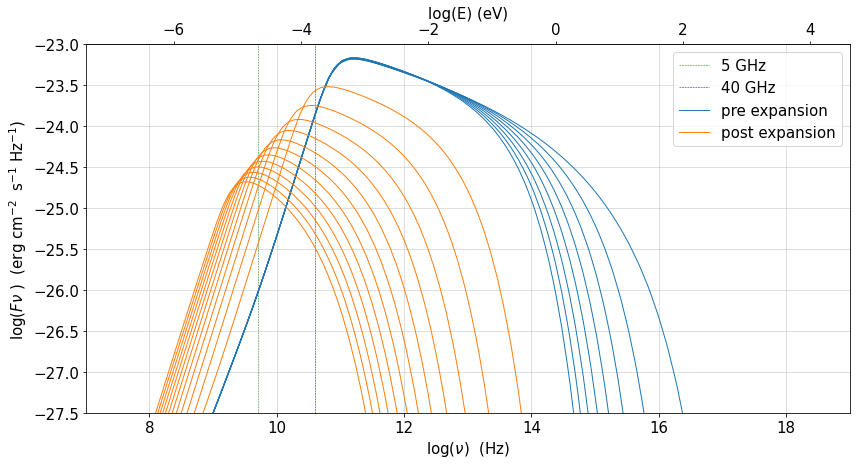

In [169]:
%matplotlib inline
plt.ion()
p=PlotSED(frame='obs',density=True)
p.resplot.remove()
skip_label=False
for i in range(0,1000,step):
    
    t=temp_ev_expansion.rad_region.time_sampled_emitters._get_time_samples(time_slice=i)
    s=temp_ev_expansion.rad_region.get_SED(comp='Sync',time_slice=i,frame='obs',use_cached=True)
    if t[0][0]<temp_ev_expansion.parameters.t_jet_exp.val:
        c='C0'
    else:
        c='C1'
    label=None
    if i==0:
        p.sedplot.axvline(np.log10(5E9),ls='--',c='green',lw=.5,label='5 GHz')
        p.sedplot.axvline(np.log10(4E10),ls='--',c='blue',lw=.5,label='40 GHz')
        label='pre expansion'
    #print(t[0][0],temp_ev_expansion.parameters.t_jet_exp.val)
    if t[0][0]>=temp_ev_expansion.parameters.t_jet_exp.val and skip_label is False:
        label='post expansion'
        skip_label=True
    p.add_model_plot(model=s,label=label,color=c,density=True,auto_label=False)
    p.rescale(y_min=-27.5,y_max=-23,x_min=7,x_max=19)
    
   
    update_sed_plot(p)
    #p.fig.savefig('movie_frames_new/fig_fnu_%4.4d.jpg'%i,    pad_inches = 0)
    


#p.fig.savefig('temp_ev_sim_exp_vs_no_exp/Fnu_beta_exp_0.1.pdf',bbox_inches = 'tight',
#    pad_inches = 0)


In [ ]:
import pickle
with open('temp_ev_sim_exp_vs_no_exp/lc_obs_beta_exp=0.001.pkl', 'rb') as f:
    l=pickle.load(f)
l.keys()


(-2.0, 60.0)

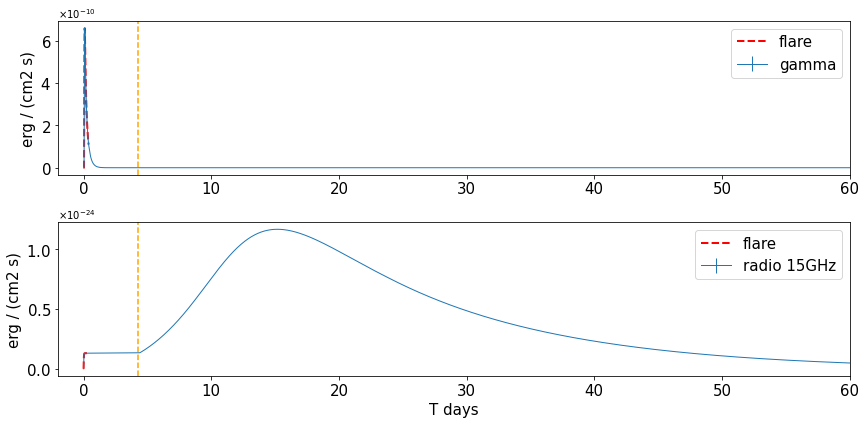

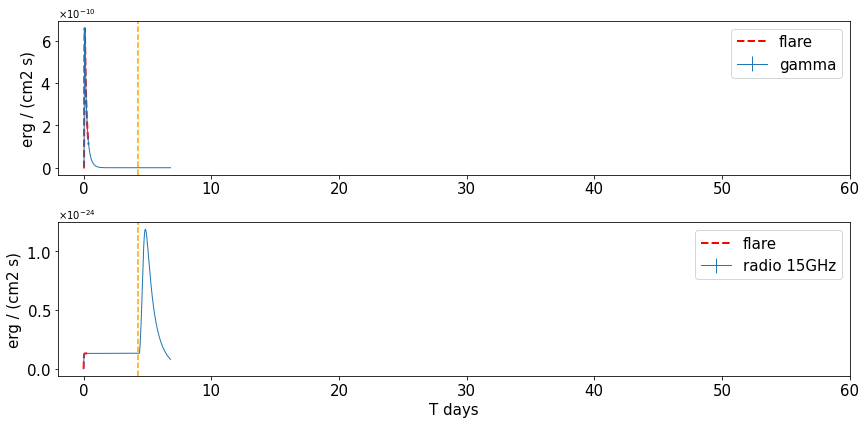

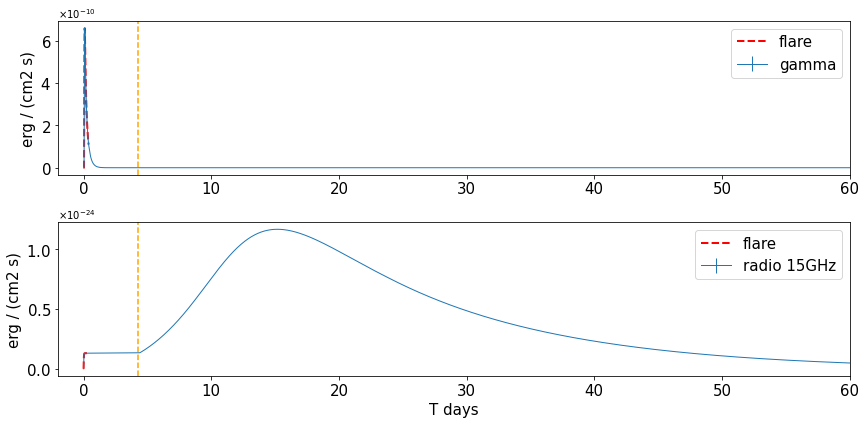

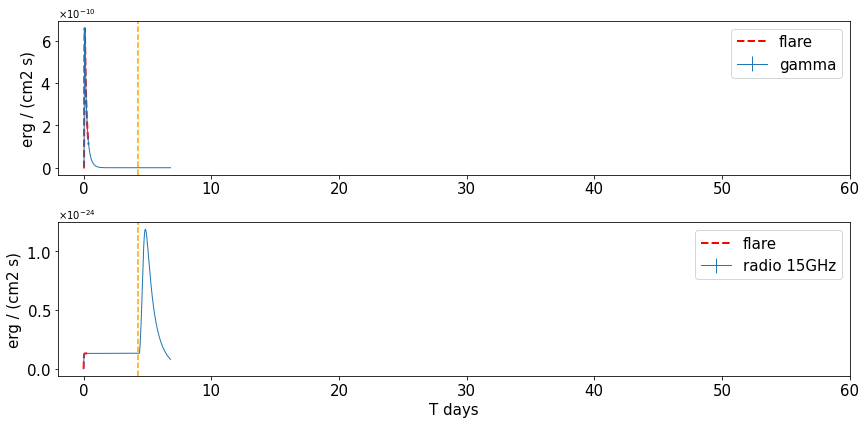

In [178]:
%matplotlib inline
plt.ion()

#for i in  range(0,1000,step):
fig1=plot_lcs(exp_lcs='temp_ev_sim_exp_change_beta/lc_obs_beta_exp=0.013.pkl',lcs_names=['lg_obs','lr_obs_15GHz'],flare_lcs='temp_ev_sim_flare/lc_obs_flare.pkl')
fig2=plot_lcs(exp_lcs='temp_ev_sim_exp_change_beta/lc_obs_beta_exp=0.300.pkl',lcs_names=['lg_obs','lr_obs_15GHz'],flare_lcs='temp_ev_sim_flare/lc_obs_flare.pkl')
update_lc_plot(fig1)
update_lc_plot(fig2)
#t=temp_ev_expansion.rad_region.time_sampled_emitters._get_time_samples(time_slice=0)
#print(t)
#t=t[0][0]
#if t<temp_ev_expansion.parameters.t_jet_exp.val:
#    c='C0'
#else:
#    c='C1'
fig1.axes[0].axvline(x=(t_exp+offset_flare)/86400/temp_ev_expansion.rad_region.jet.parameters.beam_obj.val,ls='--',c='orange')
fig1.axes[1].axvline(x=(t_exp+offset_flare)/86400/temp_ev_expansion.rad_region.jet.parameters.beam_obj.val,ls='--',c='orange')
fig2.axes[0].axvline(x=(t_exp+offset_flare)/86400/temp_ev_expansion.rad_region.jet.parameters.beam_obj.val,ls='--',c='orange')
fig2.axes[1].axvline(x=(t_exp+offset_flare)/86400/temp_ev_expansion.rad_region.jet.parameters.beam_obj.val,ls='--',c='orange')


#fig.axes[0].get_lines()[0].set_color()
#t=fig.axes[2].get_lines()[0].get_xdata()[i]
#f=fig.axes[2].get_lines()[0].get_ydata()[i]
#fig.axes[2].plot(t,f,'o',c=c)

#fig1.axes[0].set_ylim(0,None)
fig1.axes[0].set_xlim(-2,60)
fig1.axes[1].set_xlim(-2,60)
fig2.axes[0].set_xlim(-2,60)
fig2.axes[1].set_xlim(-2,60)
#fig2.axes[1].set_ylim(0,0.5E-24)
#fig.savefig('movie_frames_new/lcs_%4.4d.jpg'%i, pad_inches = 0)